# 00. PyTorch Fundamentals


In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.1.0+cu118


## Introduction to Tensors

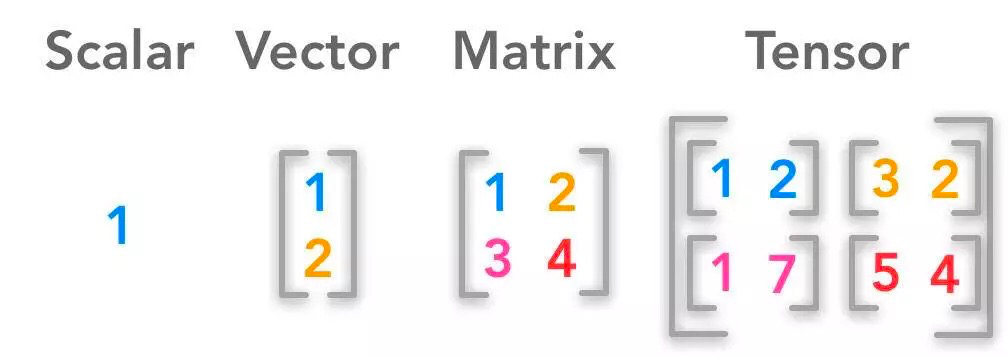

### Creating tensors

PyTorch tensors are created using `torch.Tensor()` = https://pytorch.org/docs/stable/tensors.htm


In [2]:
# scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [3]:
scalar.ndim

0

In [4]:
# Get tensor back as Python int
scalar.item()

7

In [5]:
# Vector
vector = torch.tensor([7, 7])
vector

tensor([7, 7])

In [6]:
vector.ndim

1

In [7]:
vector.shape

torch.Size([2])

In [8]:
# MATRIX
MATRIX = torch.tensor([[7, 8],
                       [9, 10]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

In [9]:
MATRIX.ndim

2

In [10]:
MATRIX[1]

tensor([ 9, 10])

In [11]:
MATRIX.shape

torch.Size([2, 2])

In [12]:
# TENSOR
TENSOR = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]]])
TENSOR

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

In [13]:
TENSOR.ndim

3

In [14]:
TENSOR.shape

torch.Size([1, 3, 3])

In [15]:
TENSOR[0]

tensor([[1, 2, 3],
        [3, 6, 9],
        [2, 4, 5]])

## Random tensors

Why random tensors?

Random tensors are important because the way many neural networks learn is that they start with tensors full of random numbers and then adjust those random numbers to better represent the data.

`Start with random numbers -> look at data -> update random numbers -> look at data -> update random numbers`


In [16]:
# Create a random tensor of size (3, 4)
random_tensor = torch.rand(3, 4)
random_tensor

tensor([[0.4628, 0.8060, 0.1922, 0.0783],
        [0.6567, 0.6433, 0.7998, 0.6864],
        [0.8938, 0.9611, 0.9671, 0.6437]])

In [17]:
# Create a random tensor with similar shape to an image tensor
# height, width, colour channels (R, G, B)
random_image_size_tensor = torch.rand(size=(224, 224, 3))
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

### Zeros and ones


In [18]:
# Create a tensor of all zeros
zeros = torch.zeros(size=(3, 4))
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [19]:
# Create a tensor of all ones
ones = torch.ones(size=(3, 4))
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [20]:
ones.dtype  # dtype = default datatype

torch.float32

In [21]:
random_tensor.dtype

torch.float32

### Creating a range of tensors and tensors-like


In [22]:
# Use torch.range()
one_to_ten = torch.arange(start=1, end=11, step=1)
one_to_ten

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [23]:
# Creating tensors like
ten_zeros = torch.zeros_like(input=one_to_ten)
# ten_zeros = torch.zeros_like(one_to_ten)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Tensor datatypes

**Note:** Tensor datatypes is one of the 3 big errors you'll run into with PyTorch and Deep Learning.

1. Tensors not right datatype
2. Tensors not right shape
3. Tensors not on the right device


In [24]:
# Float 32 tensor
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               # What data type is the tensor (e.q. float32 or float16)
                               dtype=None,
                               device=None,  # What device is your tensor on. Default to 'cpu'. Could be cuda for GPU
                               requires_grad=False)  # Whether or not to track gradients with this tensors operations.
float_32_tensor

tensor([3., 6., 9.])

In [25]:
float_32_tensor.dtype

torch.float32

In [26]:
# Convert datatype
float_16_tensor = float_32_tensor.type(torch.float16)
float_16_tensor

tensor([3., 6., 9.], dtype=torch.float16)

In [27]:
float_16_tensor * float_32_tensor

tensor([ 9., 36., 81.])

In [28]:
int_32_tensor = torch.tensor([3, 6, 9], dtype=torch.int32)
int_32_tensor

tensor([3, 6, 9], dtype=torch.int32)

In [29]:
float_32_tensor * int_32_tensor

tensor([ 9., 36., 81.])

### Getting information from tensors (tensor attributes)

1. Tensors not right datatype - to get datatype from a tensor, can use `tensor.dtype`
2. Tensors not right shape - to get shape from a tensor, can use `tensor.shape`
3. Tensors not on the right device - to get device from a tensor, can use `tensor.device`


In [30]:
# Create a tensor
some_tensor = torch.rand(3, 4)
some_tensor

tensor([[0.6250, 0.0492, 0.1779, 0.4039],
        [0.3678, 0.3570, 0.9243, 0.3180],
        [0.3759, 0.6361, 0.4603, 0.4139]])

In [31]:
# Find out details about some tensor
print(some_tensor)
print(f"Datatype of tensor: {some_tensor.dtype}")
# tensor.size() is same as shape but a method
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Device tensor is on: {some_tensor.device}")

tensor([[0.6250, 0.0492, 0.1779, 0.4039],
        [0.3678, 0.3570, 0.9243, 0.3180],
        [0.3759, 0.6361, 0.4603, 0.4139]])
Datatype of tensor: torch.float32
Shape of tensor: torch.Size([3, 4])
Device tensor is on: cpu


### Manipulating Tensors (tensor operations)

Tensor operations include:

- Addition
- Subtraction
- Multiplication (element-wise)
- Division
- Matrix multiplication


In [32]:
# Create a tensor and add 10 to it
tensor = torch.tensor([1, 2, 3])
tensor + 10

tensor([11, 12, 13])

In [33]:
# Multiply tensor by 10
tensor * 10

tensor([10, 20, 30])

In [34]:
# Subtract 10
tensor - 10

tensor([-9, -8, -7])

In [35]:
# Try out pytorch built-in funtions. Use Python built-in calculation if possible. e.q. tensor * 10 for simple calculations
torch.mul(tensor, 10)

tensor([10, 20, 30])

### Matrix multiplication

Two main ways of performing multiplication in neural networks and deep learning:

1. Element-wise multiplication
2. Matrix multiplication (dot product)

More information on multiplying matrices - https://mathsisfun.com/algebra/matrix-multiplying.html

There are two main rules that performing matrix multiplication need to satisfy:

1. The **inner dimensions** must match: (**Note:** @ is shorthand for matmul)

- `(3, 2) @ (3, 2)` won't work
- `(2, 3) @ (3, 2)` will work
- `(3, 2) @ (2, 3)` will work

2. The resulting matrix has the shape of the **outer dimensions**:

- `(2, 3) @ (3, 2)` -> `(2, 2)`
- `(3, 2) @ (2, 3)` -> `(3, 3)`


In [36]:
# Element-wise multiplication
print(tensor, "*", tensor)
print(f"Equals: {tensor * tensor}")

tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals: tensor([1, 4, 9])


In [37]:
# Matrix multiplication
torch.matmul(tensor, tensor)  # matmul stands for Matrix multiplication

tensor(14)

In [38]:
# Matrix multiplication by hand
# out: tensor([1, 2, 3])
1*1 + 2*2 + 3*3

14

##### Compare manual matrix multiplication with torch.matmul()


In [39]:
%%time
value = 0
for i in range(len(tensor)):
    value += tensor[i] * tensor[i]
print(value)

tensor(14)
CPU times: user 533 µs, sys: 0 ns, total: 533 µs
Wall time: 578 µs


In [40]:
%%time
value = torch.matmul(tensor, tensor)
print(value)

tensor(14)
CPU times: user 300 µs, sys: 0 ns, total: 300 µs
Wall time: 305 µs


### One of the most common errors in Deep Learning: shape errors


In [41]:
# Shapes for matrix multiplication
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]])

tensor_B = torch.tensor([[7, 10],
                         [8, 11],
                         [9, 12]])

# torch.mm(tensor_A, tensor_B)  # torch.mm is a shorthand for matmul
# Breaks! Breaking shape rule

In [42]:
tensor_A.shape, tensor_B.shape

(torch.Size([3, 2]), torch.Size([3, 2]))

To fix our tensors shape issue, we can manipulate the shape of one of our tensors using a **transpose**.

A **transpose** switches the axes or dimensions of a given tensor


In [43]:
tensor_B, tensor_B.shape

(tensor([[ 7, 10],
         [ 8, 11],
         [ 9, 12]]),
 torch.Size([3, 2]))

In [44]:
tensor_B.T, tensor_B.T.shape

(tensor([[ 7,  8,  9],
         [10, 11, 12]]),
 torch.Size([2, 3]))

In [45]:
# The matrix multiplication operation works when tensor_B is transposed
print(
    f"Original shapes: tensor_A = {tensor_A.shape}, tensor_B = {tensor_B.shape}")
print(
    f"New shapes: tensor_A = {tensor_A.shape} (same as above), tensor_B.T = {tensor_B.T.shape}")
print(
    f"Multiplying: {tensor_A.shape} @ {tensor_B.T.shape} <- inner dimensions must match")
print("Output:\n")
output = torch.mm(tensor_A, tensor_B.T)
print(output)
print(f"\nOutput shape: {output.shape}")

Original shapes: tensor_A = torch.Size([3, 2]), tensor_B = torch.Size([3, 2])
New shapes: tensor_A = torch.Size([3, 2]) (same as above), tensor_B.T = torch.Size([2, 3])
Multiplying: torch.Size([3, 2]) @ torch.Size([2, 3]) <- inner dimensions must match
Output:

tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])

Output shape: torch.Size([3, 3])


## Finding the min, max, mean, sum, etc (tensor aggregation)


In [46]:
# Create a tensor
x = torch.arange(1, 100, 10)
x, x.dtype

(tensor([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91]), torch.int64)

In [47]:
# Find the min
torch.min(x), x.min()

(tensor(1), tensor(1))

In [48]:
# Find the max
torch.max(x), x.max()

(tensor(91), tensor(91))

In [49]:
# Find the mean
# torch.mean(x) # Breaks since x.dtype is int64
torch.mean(x.type(torch.float32)), x.type(torch.float32).mean()

(tensor(46.), tensor(46.))

In [50]:
# Find the sum
torch.sum(x), x.sum()

(tensor(460), tensor(460))

### Finding the positional min and max


In [51]:
x

tensor([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])

In [52]:
# Find the position in tensor that has the minimum value with argmin() -> retuns index position of target tensor where the minimum value occurs
x.argmin()

tensor(0)

In [53]:
x[0]

tensor(1)

In [54]:
# Find the position in tensor that has the maximum value with argmax()
x.argmax()

tensor(9)

In [55]:
x[9]

tensor(91)

## Reshaping, stacking, squeezing and unsqueezing tensors

- Reshaping - reshapes an input tensor to a defined shape
- View - return a view of an input tensor of certain shape but keep the same memory as the original tensor
- Stacking - combine multiple tensors on top of each other (vstack) or side by side (hstack)
- Squeeze - removes all `1` dimensions from a tensor
- Unsqueeze - add a `1` dimension to a target tensor
- Permute - return a view of the input with dimensions permuted (swapped) in a certain way


In [56]:
# Create a tensor (Start new to not have to run all previous code)
import torch
x = torch.arange(1., 10.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

In [57]:
# Add an extra dimension
x_reshaped = x.reshape(1, 9)
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [58]:
# Change the view
z = x.view(1, 9)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [59]:
# Changing z changes x (because a view of a tensor shares the same memory as the original input)
z[:, 0] = 5
z, x

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [60]:
# Stack tensors on top of each other
x_stacked = torch.stack([x, x, x, x], dim=0)
x_stacked

tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [61]:
# torch.squeeze() - removes all single dimensions from a target tensor
print(f"Previous tensor: {x_reshaped}")
print(f"Previous shape: {x_reshaped.shape}")

x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor: {x_squeezed}")
print(f"New tensor shape: {x_squeezed.shape}")

Previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
Previous shape: torch.Size([1, 9])

New tensor: tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
New tensor shape: torch.Size([9])


In [62]:
# torch.unsqueeze() - adds a single dimension to a target tensor at a specific dim (dimension)
print(f"Previous target: {x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

# Add an extra dimension with unsqueeze
x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New tensor shape: {x_unsqueezed.shape}")

Previous target: tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
Previous shape: torch.Size([9])

New tensor: tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
New tensor shape: torch.Size([1, 9])


In [63]:
# torch.permute() - rearranges the dimensions of a target tensor in a specified order
# [height, width, color_channels] image format
x_original = torch.rand(size=(224, 224, 3))

# permute the original tensor to rearrange the axis (or dim) order
x_permuted = x_original.permute(2, 0, 1)  # shifts axis 0->1, 1->2, 2->0

print(f"Original shape: {x_original.shape}")  # [height, width, color_channels]
print(f"Permuted shape: {x_permuted.shape}")  # [color_channel, height, width]

Original shape: torch.Size([224, 224, 3])
Permuted shape: torch.Size([3, 224, 224])


In [64]:
# Permute creates a view. Hence the original and permuted tensor shares the same data and structure
x_original[0, 0, 0] = 728212
x_original[0, 0, 0], x_permuted[0, 0, 0]

(tensor(728212.), tensor(728212.))

## Indexing (selecting data from tensors)

Indexing with PyTorch is similar to indexing with NumPy.


In [65]:
# Create a tensor
import torch
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [66]:
# Let's index on our new tensor
x[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [67]:
# Let's index on the middle bracket (dim=1)
x[0][0]  # Can also use x[0, 0]

tensor([1, 2, 3])

In [68]:
# Let's index on the most inner bracket (last dimension)
x[0][0][0]

tensor(1)

`x[0]` gets the outer bracket containing `[[1, 2, 3], [4, 5, 6], [7, 8, 9]]`

`x[0][0]` gets the middle bracket containing `[1, 2, 3]`\
`x[0][1]` would get `[4, 5, 6]`

`x[0][0][0]` gets the most inner bracket container `1`\
`x[0][0][1]` would get `2`


In [69]:
# You can also use ":" to select "all" of a target dimension
x[:, 0]

tensor([[1, 2, 3]])

In [70]:
# Get all values of 0th and 1st dimensions but only index 1 of 2nd dimension
x[:, :, 1]

tensor([[2, 5, 8]])

In [71]:
# Get all values of the 0 dimension but only the 1 index value of 1st and 2nd dimension
x[:, 1, 1]

tensor([5])

In [72]:
# Get index 0 of 0th and 1st dimension and all values of 2nd dimension
x[0, 0, :]

tensor([1, 2, 3])

In [73]:
# Index on x to return 9
print(x[0, 2, 2])

# Index on x to return 3, 6, 9
print(x[:, :, 2])

tensor(9)
tensor([[3, 6, 9]])


## PyTorch tensors and NumPy

NumPy is a popular scientific Python numerical computing library

And because of this, PyTorch has functionality to interact with it.

- Data in NumPy, want in PyTorch tensor -> `torch.from_numpy(ndarray)`
- PyTorch tensor -> NumPy -> `torch.Tensor.numpy()`


In [74]:
# NumPy array to tensor
import torch
import numpy as np

array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [75]:
# numpy default dtype is float64, so when tensor is created based on numpy array the dtype will be float64 for the tensor as well unless specified otherwise

array.dtype, tensor.dtype, torch.arange(1.0, 8.0).dtype

(dtype('float64'), torch.float64, torch.float32)

In [76]:
# Change the value of array, what will this do to `tensor`?
array = array + 1
array, tensor  # Result: tensor does not reflect the changes made to array

(array([2., 3., 4., 5., 6., 7., 8.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [77]:
# Tensor to NumPy array
tensor = torch.ones(7)
numpy_tensor = tensor.numpy()
tensor, numpy_tensor  # array will now have pytorch default dtype of float32

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [78]:
# Change the tensor, what happens to the `numpy_tensor`?
tensor = tensor + 1
tensor, numpy_tensor  # numpy_tensor remains the same (don't share memory)

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

## Reproducibility (trying to take the random out of random)

In short how a neural network learns:

`start with random numbers -> tensor operations -> update random numbers to try and make them better representations of the data -> again -> again -> again...`

To reduce the ramdomness in neural network and PyTorch comes the concept of a **random seed**.

Esentially what the random seed does is "flavour" the randomness


In [79]:
import torch

# Create two random tensors
random_tensor_A = torch.rand(3, 4)
random_tensor_B = torch.rand(3, 4)

print(random_tensor_A)
print(random_tensor_B)
print(random_tensor_A == random_tensor_B)

tensor([[0.6187, 0.6051, 0.0239, 0.0842],
        [0.8480, 0.5564, 0.6667, 0.9145],
        [0.6460, 0.3682, 0.0347, 0.9757]])
tensor([[0.0079, 0.3617, 0.4368, 0.8393],
        [0.3683, 0.2384, 0.0011, 0.8109],
        [0.7421, 0.1669, 0.5514, 0.5719]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [80]:
# Let's make some random but reproducible tensors

# Set the random seed
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
random_tensor_C = torch.rand(3, 4)

torch.manual_seed(RANDOM_SEED)
random_tensor_D = torch.rand(3, 4)

print(random_tensor_C)
print(random_tensor_D)
print(random_tensor_C == random_tensor_D)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


Extra resources for reproduceibility:

- https://pytorch.org/docs/stable/notes/randomness.html
- https://en.wikipedia.org/wiki/Random_seed


## Running tensors and PyTorch objects on the GPUs (and making faster computations)

GPUs = faster computation of numbers, thanks to CUDA + NVIDIA hardware + PyTorch working behind the scenes to make everything hunky dory (good).


### Getting a GPU

1. Easiest - Use Google Colab for a free GPU (options to upgrade as well)
2. Use your own GPU - takes a little bit of setup
3. Use cloud computing - GCP, AWS, Azure, these services allow you to rent computers on the cloud an access them

For 2, 3 PyTorch + GPU drivers (CUDA) takes a little bit of setting up, to do this, refer to PyTorch setup documenation


In [81]:
# !nvidia-smi

Wed Nov 29 11:15:18 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### 2. Check for GPU access with PyTorch


In [82]:
# Check for GPU access
import torch
torch.cuda.is_available()

True

For PyTorch it is best to setup device agnostic code.

E.g run on GPU if available, else default to CPU


In [83]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [84]:
# Count number of devices
torch.cuda.device_count()

1

## 3. Putting tensors (and models) on the GPU

The reason we want our tensors/models on the GPUis because useing a GPU results in faster computations


In [86]:
# Create a tensor (default on the CPU)
tensor = torch.tensor([1, 2, 3])

# Tensor not on GPU
print(tensor, tensor.device)

tensor([1, 2, 3]) cpu


In [87]:
# Move tensor to GPU (if available)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

### 4. Moving tensors back to the cpu


In [90]:
# If tensor is on GPU, can't transform it to NumPy
# tensor_on_gpu.numpy() # breaks! : can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [89]:
# To fix the GPU tensor with NumPy issue, we can first set it to the CPU
tensor_back_to_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_to_cpu

array([1, 2, 3])

## Exercises & Extra-curriculum

See exercises for this notebook here: https://www.learnpytorch.io/00_pytorch_fundamentals/#exercises
